In [1]:
import numpy as np
import matplotlib.pyplot as plt

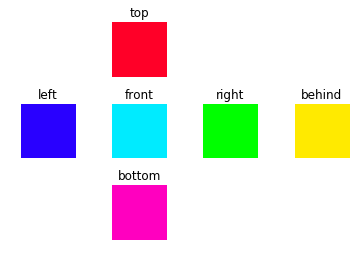

In [80]:
class rubiks_cube:
    def __init__(self):
        self.cube = np.zeros((5,5,5))
        self.top = self.cube[0,1:4,1:4]# = np.full((3,3), 1)
        self.behind = self.cube[1:4,0,1:4]# = np.full((3,3), 2)
        self.right = self.cube[1:4,1:4,4]# = np.full((3,3), 3)
        self.front = self.cube[1:4,4,1:4]# = np.full((3,3), 4)
        self.left = self.cube[1:4,1:4,0]# = np.full((3,3), 5)
        self.bottom = self.cube[4,1:4,1:4]# = np.full((3,3), 6)
        self.cube[0,1:4,1:4] = np.full((3,3), 1)
        self.cube[1:4,0,1:4] = np.full((3,3), 2)
        self.cube[1:4,1:4,4] = np.full((3,3), 3)
        self.cube[1:4,4,1:4] = np.full((3,3), 4)
        self.cube[1:4,1:4,0] = np.full((3,3), 5)
        self.cube[4,1:4,1:4] = np.full((3,3), 6)
        self.actions = ['tl', 'tr', 'dl', 'dr', 'fr', 'fl', 'br', 'bl', 'lf', 'lb', 'rf', 'rb']
        self.nA = len(self.actions)
        
    def reset(self):
        self.cube[0,1:4,1:4] = np.full((3,3), 1)
        self.cube[1:4,0,1:4] = np.full((3,3), 2)
        self.cube[1:4,1:4,4] = np.full((3,3), 3)
        self.cube[1:4,4,1:4] = np.full((3,3), 4)
        self.cube[1:4,1:4,0] = np.full((3,3), 5)
        self.cube[4,1:4,1:4] = np.full((3,3), 6)
        
    def print_faces(self):
        print(self.top)
        print(self.behind)
        print(self.left)
        print(self.front)
        print(self.right)
        print(self.bottom)
        
    def print_gui(self):
        extent = [1,4,1,4]
        cmap = 'gist_rainbow'
        
        fig = plt.figure()
        fig.subplots_adjust(wspace=0.5, hspace=0.5)
        
        ax1 = plt.subplot2grid((3,4), (0,1))
        ax1.set_title('top')
        ax1.imshow(self.top,plt.get_cmap(cmap),extent=extent, vmin=1, vmax=6)
        ax1.axis('off')
        
        ax2 = plt.subplot2grid((3,4), (1,3))
        ax2.set_title('behind')
        ax2.imshow(self.behind,plt.get_cmap(cmap),extent=extent, vmin=1, vmax=6)
        ax2.axis('off')
        
        ax3 = plt.subplot2grid((3,4), (1,0))
        ax3.set_title('left')
        ax3.imshow(self.left,plt.get_cmap(cmap),extent=extent, vmin=1, vmax=6)
        ax3.axis('off')
        
        ax4 = plt.subplot2grid((3,4), (1,1))
        ax4.set_title('front')
        ax4.imshow(self.front,plt.get_cmap(cmap),extent=extent, vmin=1, vmax=6)
        ax4.axis('off')
        
        ax5 = plt.subplot2grid((3,4), (1,2))
        ax5.set_title('right')
        ax5.imshow(np.flip(self.right, 1),plt.get_cmap(cmap),extent=extent, vmin=1, vmax=6)
        ax5.axis('off')
        
        ax6 = plt.subplot2grid((3,4), (2,1))
        ax6.set_title('bottom')
        ax6.imshow(np.flip(self.bottom, 0),plt.get_cmap(cmap),extent=extent, vmin=1, vmax=6)
        ax6.axis('off')
        
        plt.show()
        
    def step(self, action):        
        if self.actions[action] == 'tl':
            face = self.top
            near = self.cube[1]
            axis = 1
        elif self.actions[action] == 'tr':
            face = self.top
            near = self.cube[1]
            axis = 0
        elif self.actions[action] == 'dl':
            face = self.bottom
            near = self.cube[3]
            axis = 0
        elif self.actions[action] == 'dr':
            face = self.bottom
            near = self.cube[3]
            axis = 1
        elif self.actions[action] == 'fr':
            face = self.front
            near = self.cube[:,3]
            axis = 0
        elif self.actions[action] == 'fl':
            face = self.front
            near = self.cube[:,3]
            axis = 1
        elif self.actions[action] == 'br':
            face = self.behind
            near = self.cube[:,1]
            axis = 0
        elif self.actions[action] == 'bl':
            face = self.behind
            near = self.cube[:,1]
            axis = 1
        elif self.actions[action] == 'lf':
            face = self.left
            near = self.cube[:,:,1]
            axis = 0
        elif self.actions[action] == 'lb':
            face = self.left
            near = self.cube[:,:,1]
            axis = 1
        elif self.actions[action] == 'rf':
            face = self.right
            near = self.cube[:,:,3]
            axis = 0
        elif self.actions[action] == 'rb':
            face = self.right
            near = self.cube[:,:,3]
            axis = 1
            
        a = np.flip(face, axis)
        a = np.transpose(a)
        face = a

        a = np.flip(near, axis)
        a = np.transpose(a)
        near = a
        
        if self.actions[action][0] == 't':
            self.top = face
            self.cube[1] = near
        elif self.actions[action][0] == 'd':
            self.bottom = face
            self.cube[3] = near
        elif self.actions[action][0] == 'f':
            self.front = face
            self.cube[:,3] = near
        elif self.actions[action][0] == 'b':
            self.behind = face
            self.cube[:,1] = near
        elif self.actions[action][0] == 'l':
            self.left = face
            self.cube[:,:,1] = near
        elif self.actions[action][0] == 'r':
            self.right = face
            self.cube[:,:,3] = near
            
        return self.cube, self.reward(), self.reward()==1.0
            
    def shuffle(self, steps=10):
        shuffle = np.random.randint(len(self.actions), size=steps)
        
        for i in shuffle:
            self.step(i)
            
    def action_sample(self):
        return np.random.randint(len(self.actions))
            
    def reward(self):
#         top = np.mean(np.equal(self.top, np.full((3,3), 1)))
#         behind = np.mean(np.equal(self.behind, np.full((3,3), 2)))
#         right = np.mean(np.equal(self.right, np.full((3,3), 3)))
        front = np.mean(np.equal(self.front, np.full((3,3), 4)))
#         left = np.mean(np.equal(self.left, np.full((3,3), 5)))
#         bottom = np.mean(np.equal(self.bottom, np.full((3,3), 6)))
        
#         return np.mean([top, bottom, behind, front, left, right])
        return front

env = rubiks_cube()
env.print_gui()

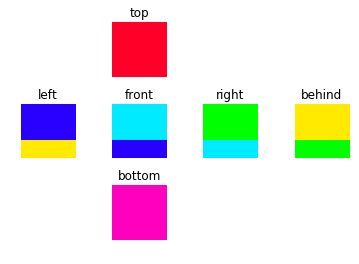

In [81]:
env.shuffle(1)
env.print_gui()

In [82]:
import tensorflow as tf

In [83]:
from collections import deque

class Memory():
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
            
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

In [84]:
class QNetwork:
    def __init__(self, learning_rate=0.01, state_size=125,
                 action_size=12, hidden_size=10,
                 name='QNetwork'):
        with tf.variable_scope(name):
            self.inputs_ = tf.placeholder(tf.float32, [None, state_size], name='inputs')
            
            self.actions_ = tf.placeholder(tf.int32, [None], name='actions')
            one_hot_actions = tf.one_hot(self.actions_, action_size)
            
            self.targetQs_ = tf.placeholder(tf.float32, [None], name='target')
            
            self.fc1 = tf.contrib.layers.fully_connected(self.inputs_, hidden_size)
            self.fc2 = tf.contrib.layers.fully_connected(self.fc1, hidden_size)

            self.output = tf.contrib.layers.fully_connected(self.fc2, action_size, 
                                                            activation_fn=None)
            self.Q = tf.reduce_sum(tf.multiply(self.output, one_hot_actions), axis=1)
            
            self.loss = tf.reduce_mean(tf.square(self.targetQs_ - self.Q))
            self.opt = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

In [85]:
train_episodes = 1000          # max number of episodes to learn from
max_steps = 50                # max steps in an episode
gamma = 0.99                   # future reward discount

# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
hidden_size = 64               # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 20                # experience mini-batch size
pretrain_length = batch_size   # number experiences to pretrain the memory

In [86]:
tf.reset_default_graph()
mainQN = QNetwork(name='main', hidden_size=hidden_size, learning_rate=learning_rate)

In [87]:
n_shuffle = 2

In [88]:
env.reset()
env.shuffle(n_shuffle)
# state, reward, done = env.step(env.action_sample())

memory = Memory(max_size=memory_size)

for ii in range(pretrain_length):
    action = env.action_sample()
    next_state, reward, done = env.step(action)
    
    if done:
        memory.add((state, action, reward, next_state))
        env.shuffle(n_shuffle)
#         state, reward, done = env.step(env.action_sample())
    else:
        memory.add((state, action, reward, next_state))
        state = next_state


In [89]:
saver = tf.train.Saver()
rewards_list = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    step = 0
    for ep in range(1, train_episodes):
        total_reward = 0
        t = 0
        while t < max_steps:
            step += 1
            
            explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*step)
#             explore_p = np.random.rand()
            if explore_p > np.random.rand():
                action = env.action_sample()
            else:
                feed = {mainQN.inputs_: state.reshape(1, -1)}
                Qs = sess.run(mainQN.output, feed_dict=feed)
                action = np.argmax(Qs)
                
            next_state, reward, done = env.step(action)
            
            total_reward += reward
            
            if done:
                t = max_steps
                
                print('Episode: {}'.format(ep),
                      'Total reward: {}'.format(total_reward),
                      'Training loss: {:.4f}'.format(loss),
                      'Explore P: {:.4f}'.format(explore_p))
                rewards_list.append((ep, total_reward))
                
                memory.add((state, action, reward, next_state))
                
                env.shuffle(n_shuffle)
                
#                 state, reward, done = env.step(env.action.sample())
            else:
                memory.add((state, action, reward, next_state))
                state = next_state
                t += 1
                
            batch = memory.sample(batch_size)
            states = np.array([each[0].reshape(-1) for each in batch])
            actions = np.array([each[1] for each in batch])
            rewards = np.array([each[2] for each in batch])
            next_states = np.array([each[3].reshape(-1) for each in batch])
            
            target_Qs = sess.run(mainQN.output, feed_dict={mainQN.inputs_: next_states})
            
            targets = rewards + gamma * np.max(target_Qs, axis=1)
            
            loss, _ = sess.run([mainQN.loss, mainQN.opt],
                                feed_dict={mainQN.inputs_: states,
                                           mainQN.targetQs_: targets,
                                           mainQN.actions_: actions})
            
    saver.save(sess, 'checkpoints/rubiks_cube.ckpt')

INFO:tensorflow:Restoring parameters from checkpoints\rubiks_cube.ckpt
1


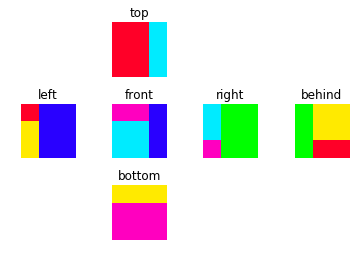

0 0.2222222222222222 False


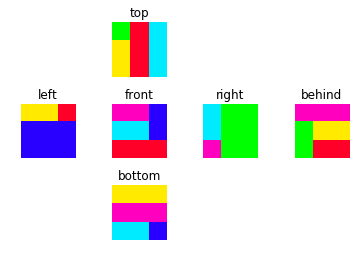

1 0.2222222222222222 False


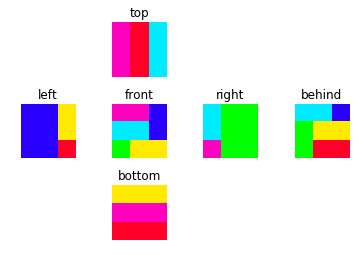

2 0.2222222222222222 False


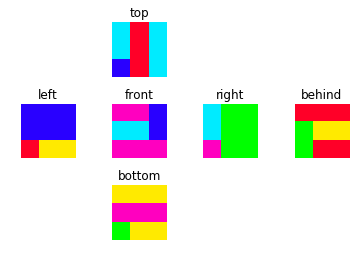

3 0.4444444444444444 False


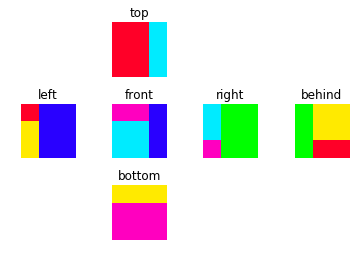

4 0.2222222222222222 False


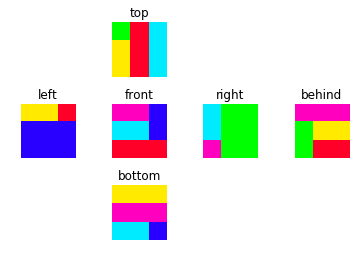

5 0.2222222222222222 False


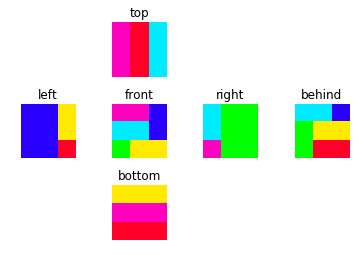

6 0.2222222222222222 False


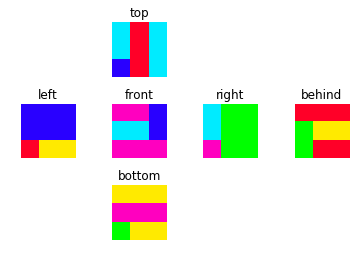

7 0.4444444444444444 False


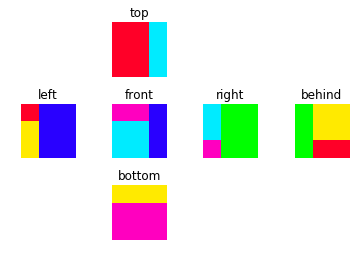

8 0.2222222222222222 False


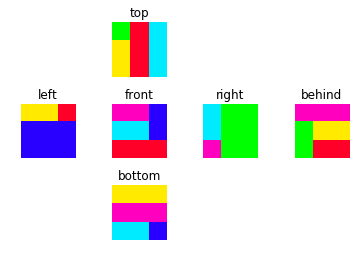

9 0.2222222222222222 False


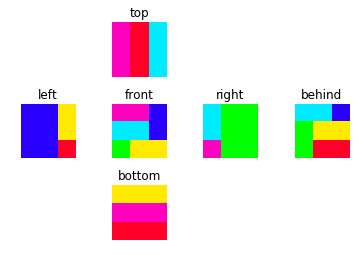

10 0.2222222222222222 False


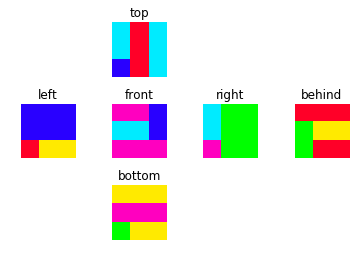

11 0.4444444444444444 False


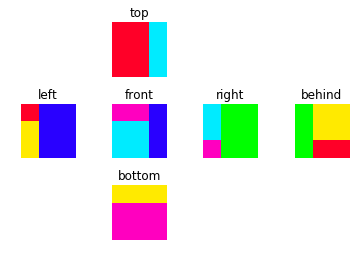

12 0.2222222222222222 False


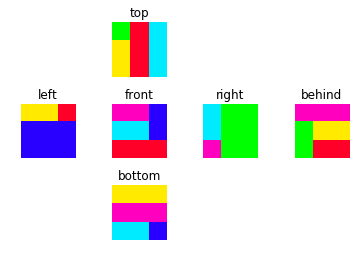

13 0.2222222222222222 False


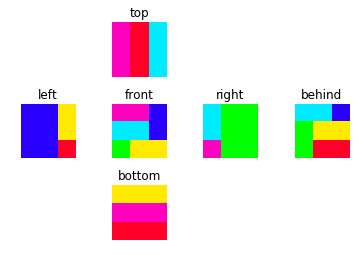

14 0.2222222222222222 False


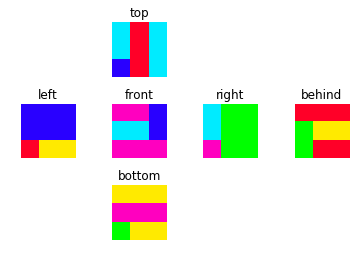

15 0.4444444444444444 False


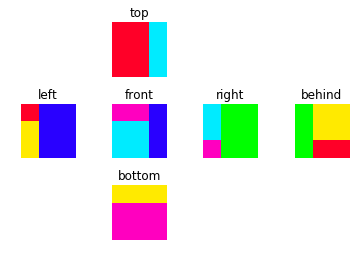

16 0.2222222222222222 False


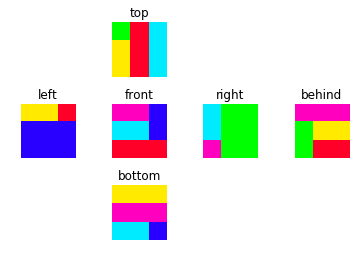

17 0.2222222222222222 False


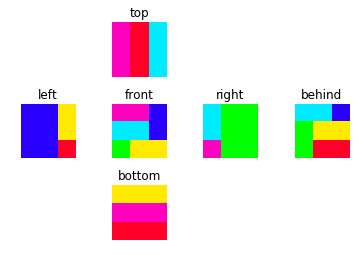

18 0.2222222222222222 False


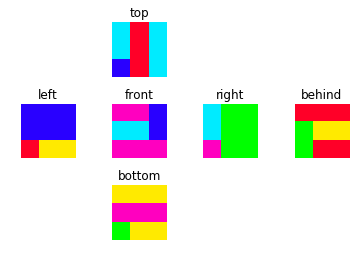

19 0.4444444444444444 False


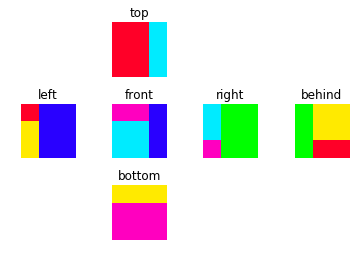

20 0.2222222222222222 False


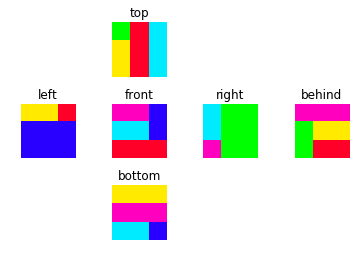

21 0.2222222222222222 False


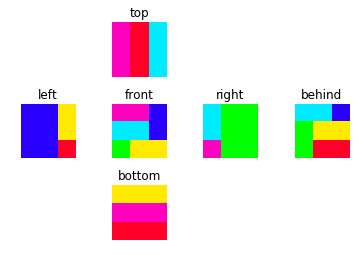

22 0.2222222222222222 False


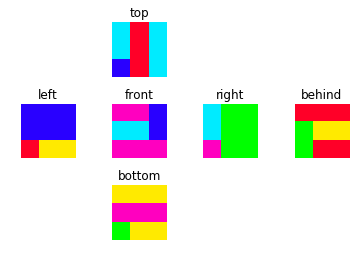

23 0.4444444444444444 False


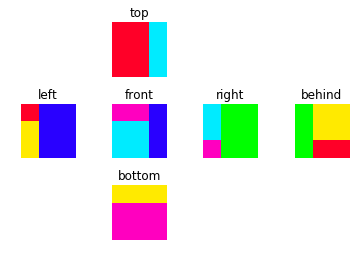

24 0.2222222222222222 False


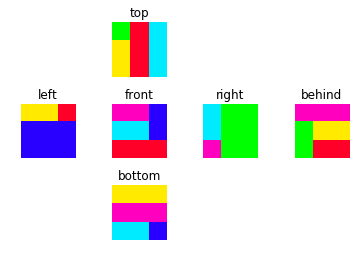

25 0.2222222222222222 False


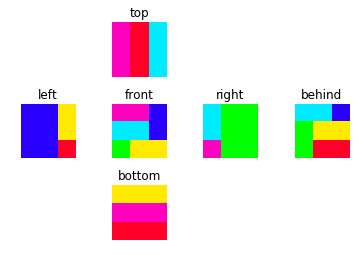

26 0.2222222222222222 False


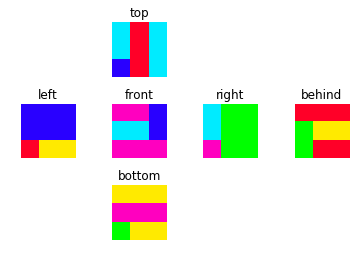

27 0.4444444444444444 False


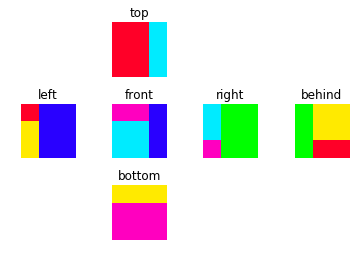

28 0.2222222222222222 False


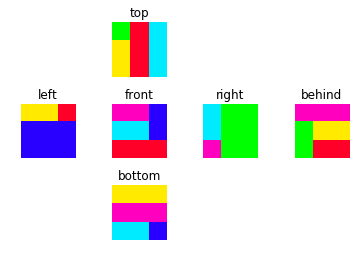

29 0.2222222222222222 False


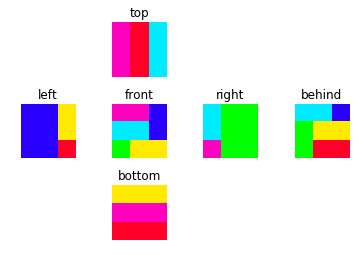

30 0.2222222222222222 False


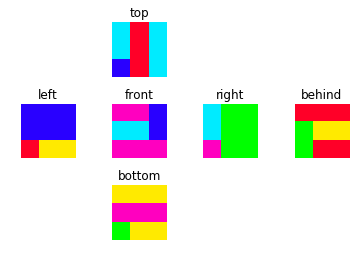

31 0.4444444444444444 False


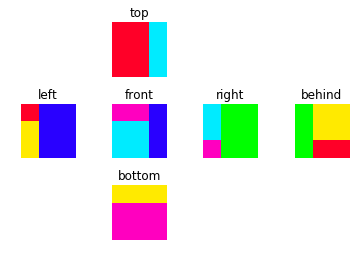

32 0.2222222222222222 False


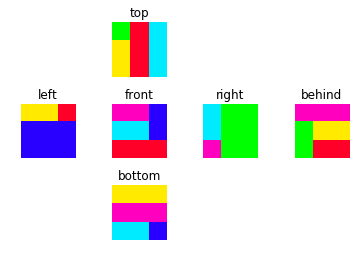

33 0.2222222222222222 False


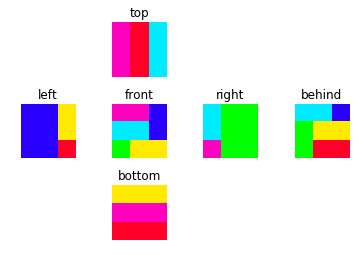

34 0.2222222222222222 False


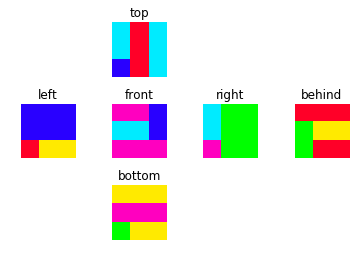

35 0.4444444444444444 False


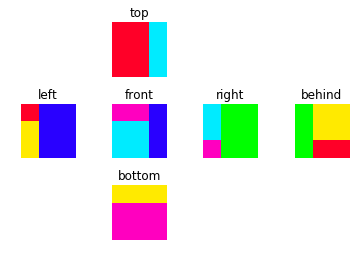

36 0.2222222222222222 False


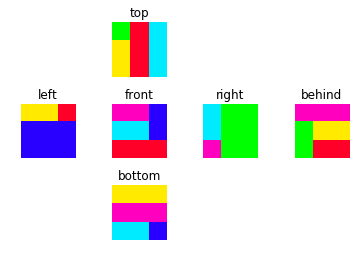

37 0.2222222222222222 False


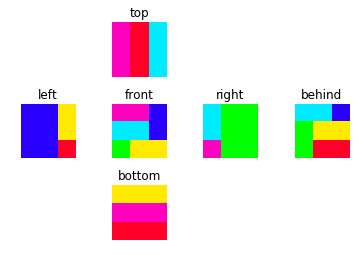

38 0.2222222222222222 False


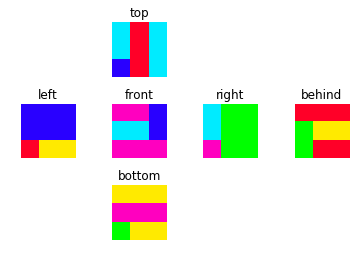

39 0.4444444444444444 False


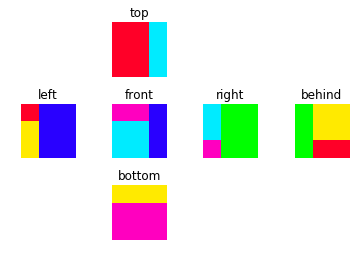

40 0.2222222222222222 False


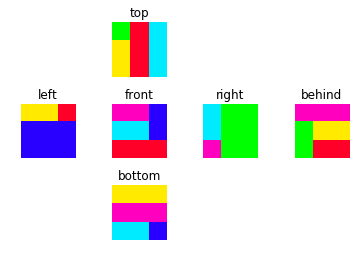

41 0.2222222222222222 False


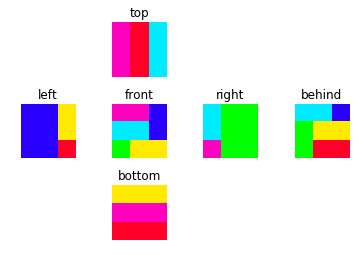

42 0.2222222222222222 False


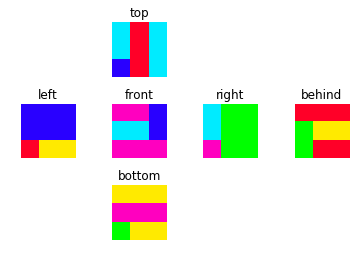

43 0.4444444444444444 False


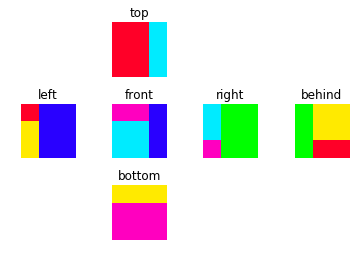

44 0.2222222222222222 False


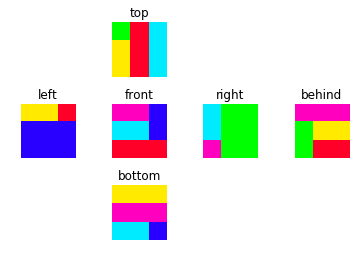

45 0.2222222222222222 False


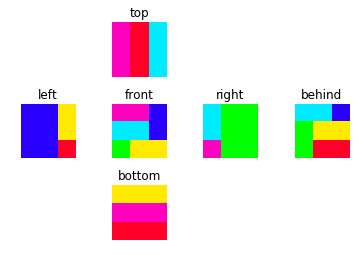

46 0.2222222222222222 False


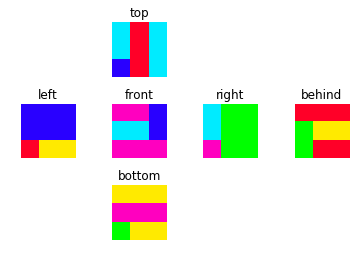

47 0.4444444444444444 False


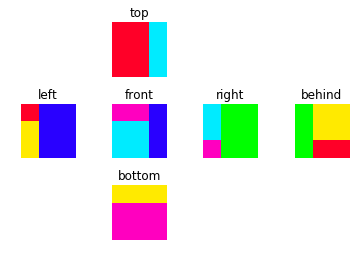

48 0.2222222222222222 False


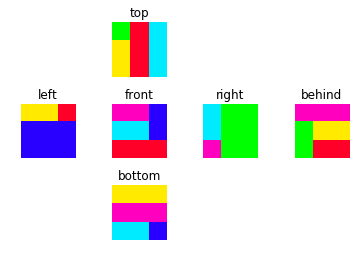

49 0.2222222222222222 False


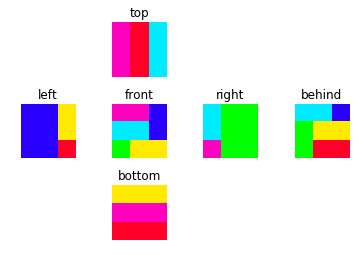

50 0.2222222222222222 False


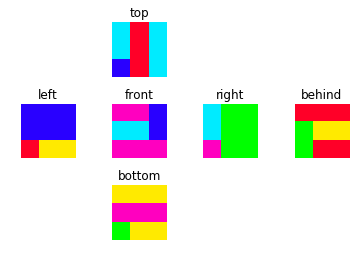

51 0.4444444444444444 False


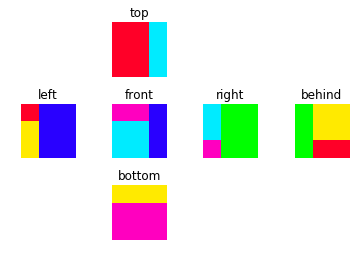

52 0.2222222222222222 False


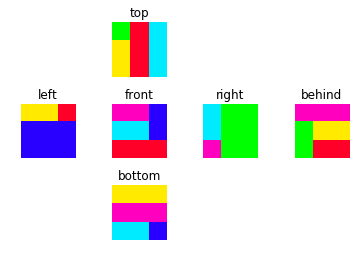

53 0.2222222222222222 False


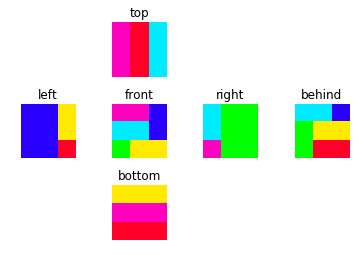

54 0.2222222222222222 False


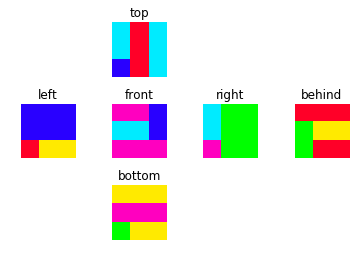

55 0.4444444444444444 False


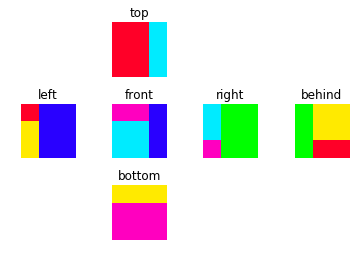

56 0.2222222222222222 False


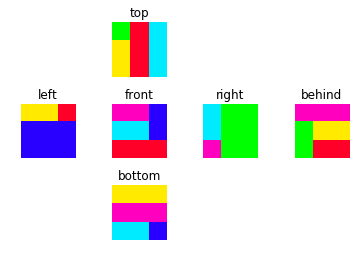

57 0.2222222222222222 False


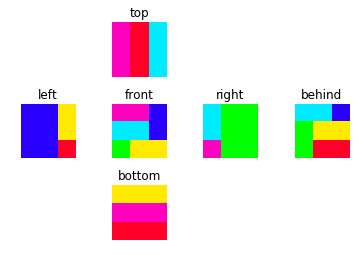

58 0.2222222222222222 False


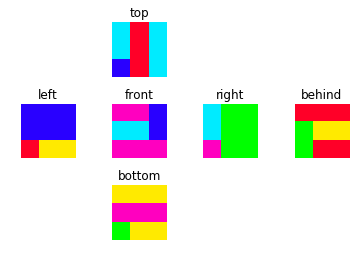

59 0.4444444444444444 False


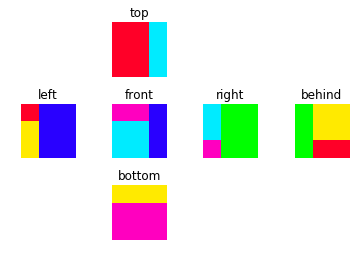

60 0.2222222222222222 False


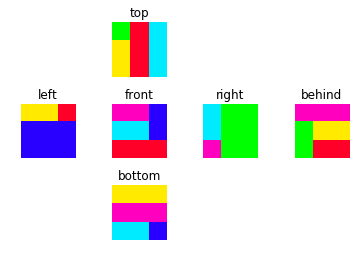

61 0.2222222222222222 False


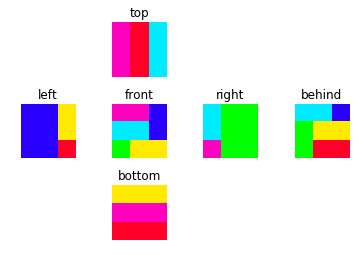

62 0.2222222222222222 False


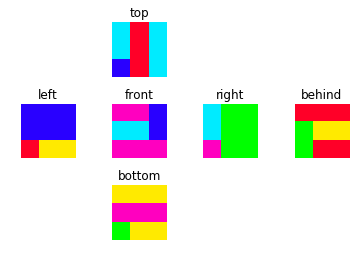

63 0.4444444444444444 False


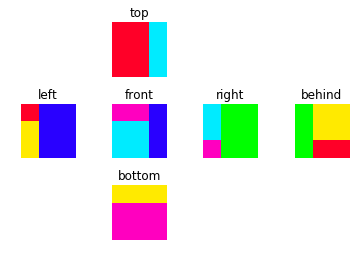

64 0.2222222222222222 False


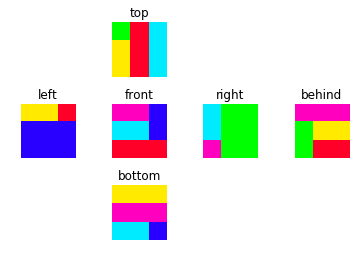

65 0.2222222222222222 False


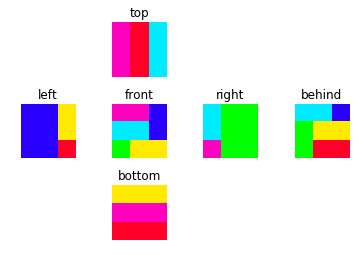

66 0.2222222222222222 False


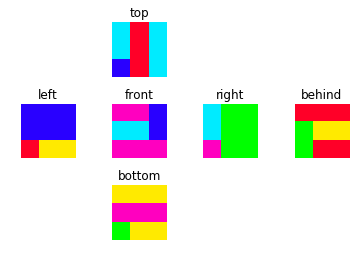

67 0.4444444444444444 False


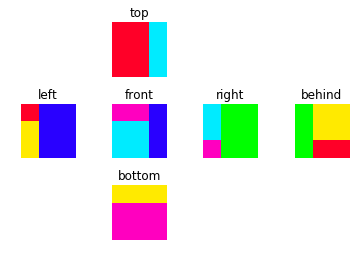

68 0.2222222222222222 False


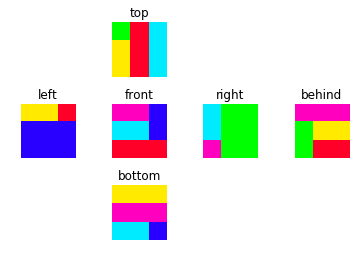

69 0.2222222222222222 False


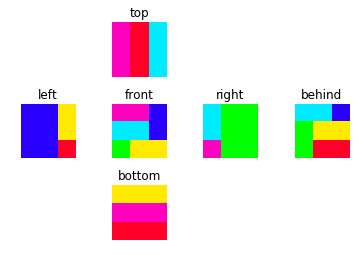

70 0.2222222222222222 False


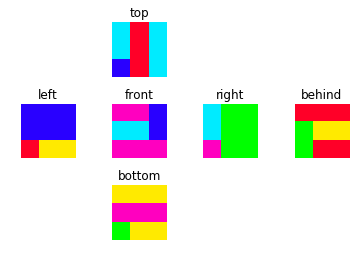

71 0.4444444444444444 False


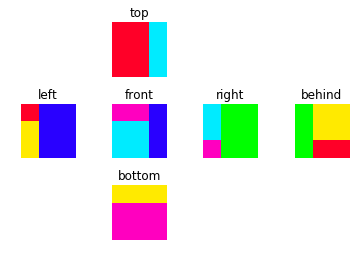

72 0.2222222222222222 False


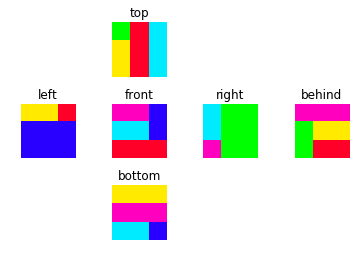

73 0.2222222222222222 False


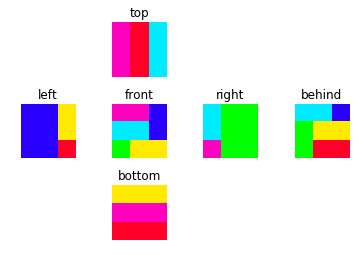

74 0.2222222222222222 False


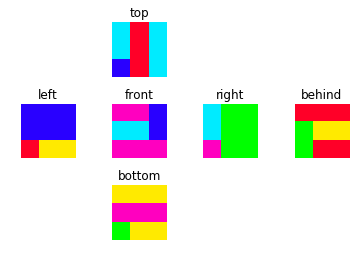

75 0.4444444444444444 False


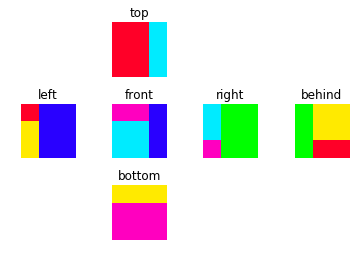

76 0.2222222222222222 False


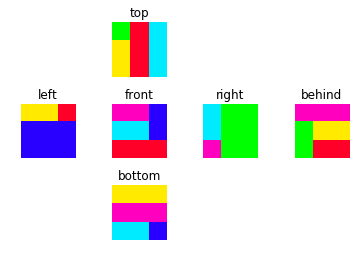

77 0.2222222222222222 False


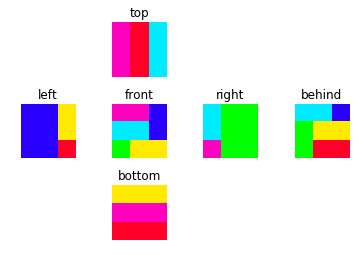

78 0.2222222222222222 False


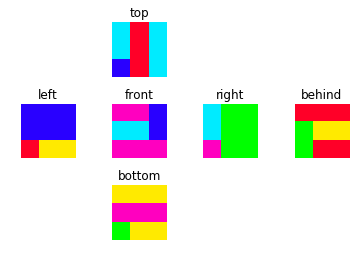

79 0.4444444444444444 False


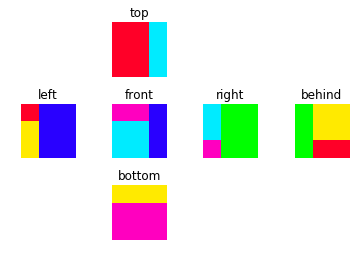

80 0.2222222222222222 False


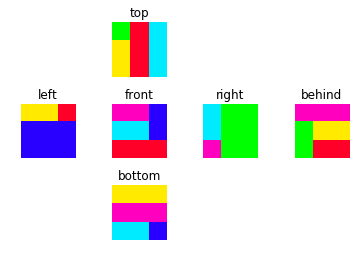

81 0.2222222222222222 False


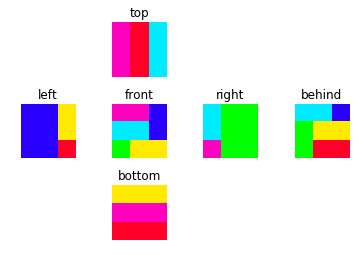

82 0.2222222222222222 False


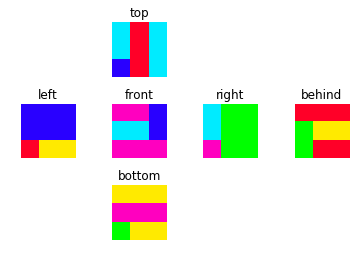

83 0.4444444444444444 False


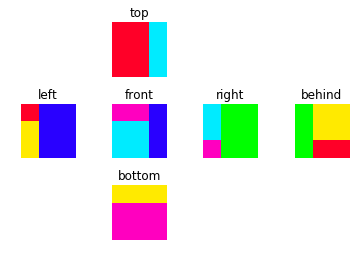

84 0.2222222222222222 False


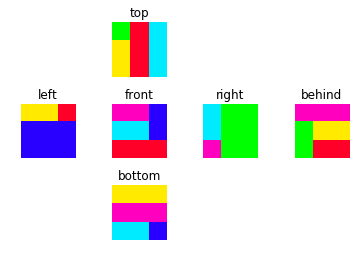

85 0.2222222222222222 False


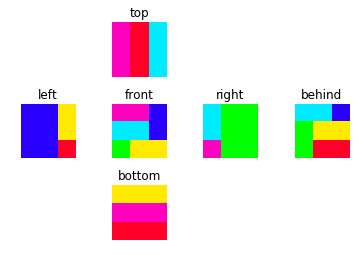

86 0.2222222222222222 False


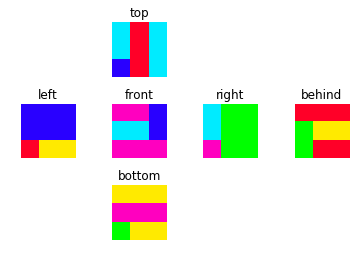

87 0.4444444444444444 False


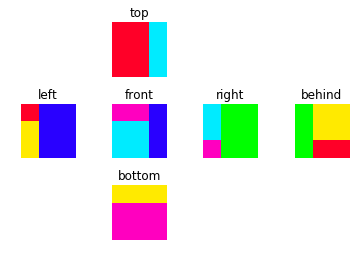

88 0.2222222222222222 False


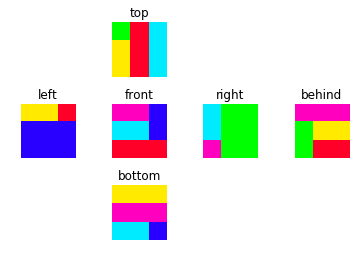

89 0.2222222222222222 False


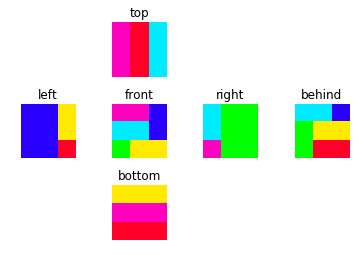

90 0.2222222222222222 False


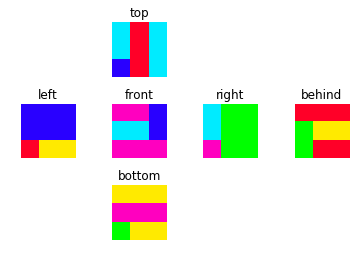

91 0.4444444444444444 False


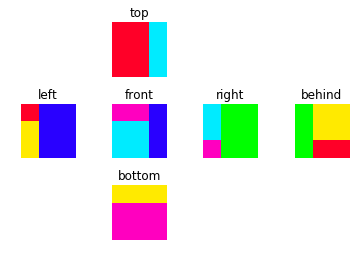

92 0.2222222222222222 False


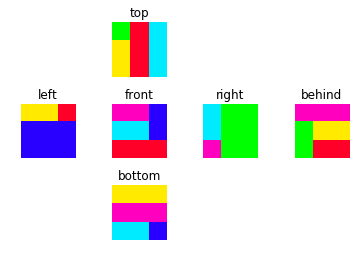

93 0.2222222222222222 False


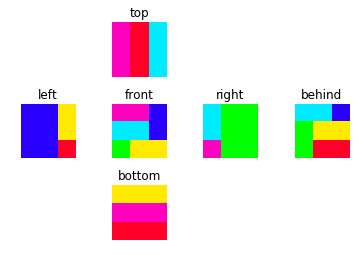

94 0.2222222222222222 False


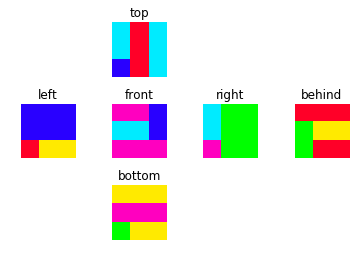

95 0.4444444444444444 False


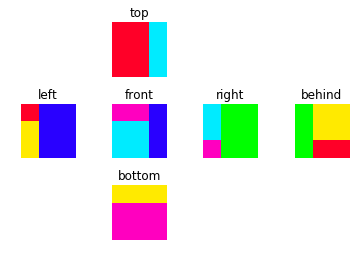

96 0.2222222222222222 False


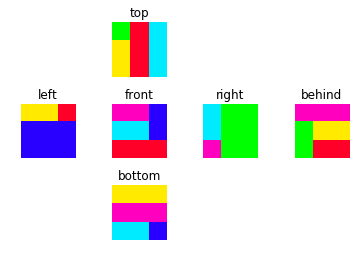

97 0.2222222222222222 False


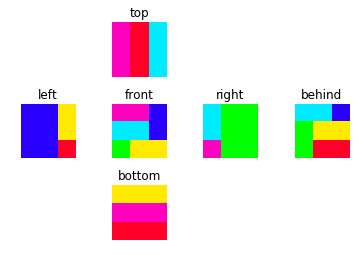

98 0.2222222222222222 False


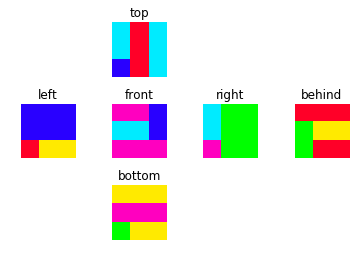

99 0.4444444444444444 False


In [90]:
test_episodes = 2
test_max_steps = 100
env.reset()
env.shuffle(n_shuffle)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    for ep in range(1, test_episodes):
        t = 0
        print(ep)
        while(t < test_max_steps):
            env.print_gui()
            
            feed = {mainQN.inputs_: state.reshape((1,-1))}
            Qs= sess.run(mainQN.output, feed_dict=feed)
            action = np.argmax(Qs)
            
            next_state, reward, done = env.step(action)
            print(t, reward, done)
            
            if done:
                t = test_max_steps
                env.shuffle(n_shuffle)
            else:
                state = next_state
                t += 1